<a id='start'></a> 

# Solar Orbiter Data Tutorial

## RPW BIAS - Thermal Noise Receiver (TNR)

### author: Louis Richard, IRFU
<font size="3"> louisr@irfu.se </font> 

## Outline
1. [Setup](#setup)
1. [TNR data analysis](#tnr_data_analysis)
1. [Plasma line](#plasma_line)
1. [Radio Burst](#radio_burst)
1. [Some waves](#some_waves)
1. [Earth's Flyby](#earths_flyby)

<a id='setup'></a>

## Import SolO submodule from the __[pyrfu](https://pypi.org/project/pyrfu/)__ package and setup path to SolO data

In [13]:
%matplotlib inline

import os 

import os
import numpy as np

from scipy import constants

# import SolO subpackage from the pyrfu package
from pyrfu import solo

# import ploting packages and setup plot style
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from pyrfu.plot import plot_spectr, plot_line

# Setup path to SolO data
solo.db_init("./data")

<a id='tnr_data_analysis'></a>

## TNR data analysis

### Load TNR data

In [14]:
tint = ["2020-11-13T00:00:00", "2020-11-13T23:59:59"]
sensor = 4
tnr_spec = solo.read_tnr(tint)

15-Sep-22 16:57:12: Loading solo_L2_rpw-tnr-surv_20201113_V02.cdf...


### Plot TNR spectrum

Text(0, 0.5, 'V1 - V2')

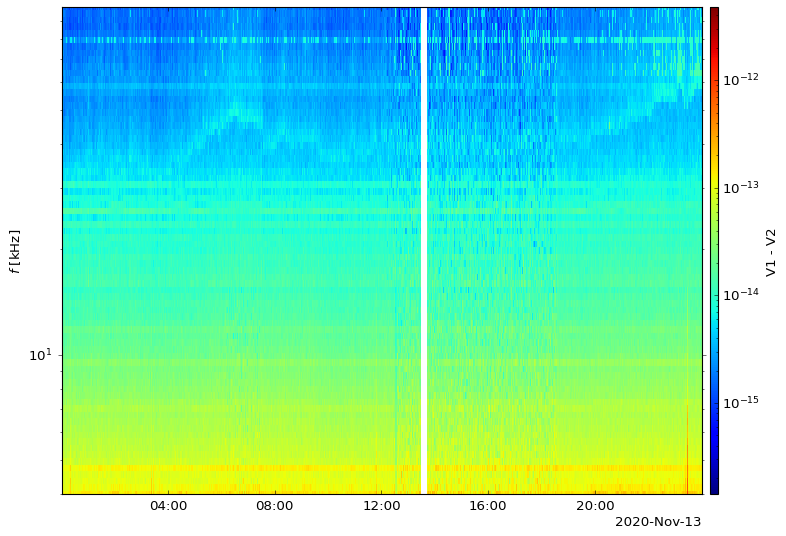

In [15]:
f, ax = plt.subplots(1, figsize=(10, 7))
f.subplots_adjust(left=.1, right=.9, bottom=.08, top=.95)
ax, cax = plot_spectr(ax, tnr_spec, yscale="log", cscale="log")
ax.tick_params("y", which="both", direction="out")
ax.yaxis.set_major_locator(ticker.LogLocator(base=10, numticks=15))
ax.set_ylabel("$f$ [kHz]")
cax.set_ylabel("V1 - V2")

<a id='plasma_line'></a>

## Plasma Line

### Load LFR density

In [16]:
help(solo.read_lfr_density)

Help on function read_lfr_density in module pyrfu.solo.read_lfr_density:

read_lfr_density(tint, data_path: str = '', tree: bool = False)
    Read L3 density data from LFR
    
    Parameters
    ----------
    tint : list
        Time interval
    data_path : str, Optional
        Path of MMS data. Default uses `pyrfu.solo.config.json`
    tree : bool, Optional
        Flag for tree structured data repos. Default is False.
    
    Returns
    -------
    out : xarray.DataArray
        Time series of the density.



In [17]:
dens = solo.read_lfr_density(tint)

15-Sep-22 16:57:14: Loading solo_L3_rpw-bia-density_20201113_V01.cdf...


### Compute plasma frequency from density

In [18]:
w_pe = np.sqrt(dens * constants.elementary_charge ** 2 / (constants.electron_mass * constants.epsilon_0))
f_pe = w_pe / (2 * np.pi)

Text(0, 0.5, 'V1 - V2')

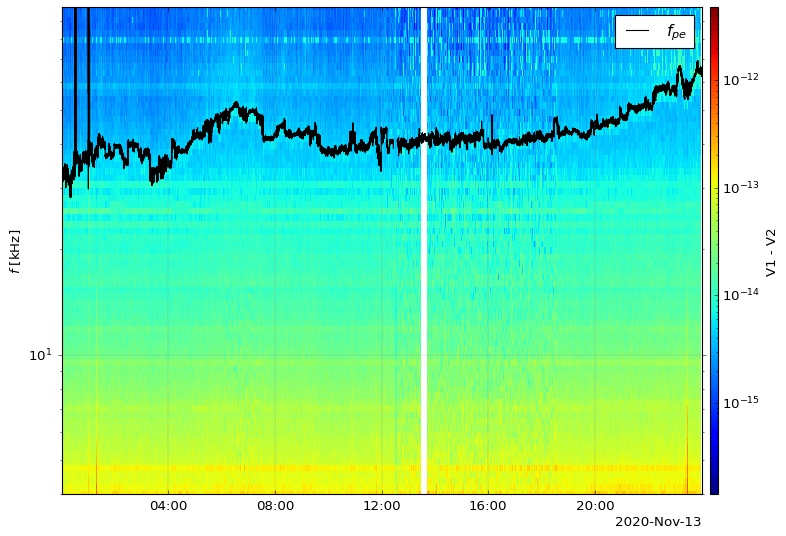

In [19]:
f, ax = plt.subplots(1, figsize=(10, 7))
f.subplots_adjust(left=.1, right=.9, bottom=.08, top=.95)
ax, cax = plot_spectr(ax, tnr_spec, yscale="log", cscale="log")
plot_line(ax, f_pe, color="k", label="$f_{pe}$")
ax.legend()
ax.tick_params("y", which="both", direction="out")
ax.yaxis.set_major_locator(ticker.LogLocator(base=10, numticks=15))
ax.set_ylabel("$f$ [kHz]")
cax.set_ylabel("V1 - V2")

<a id='radio_burst'></a>

## Radio Burst and Langmuir Waves

In [20]:
tint = ["2020-11-18T00:00:00", "2020-11-18T23:59:59"]

# TNR spectrum
sensor = 4
tnr_spec = solo.read_tnr(tint)

# LFR density
dens = solo.read_lfr_density(tint)

# Compute plasma line
w_pe = np.sqrt(dens * constants.elementary_charge ** 2 / (constants.electron_mass * constants.epsilon_0))
f_pe = w_pe / (2 * np.pi)

15-Sep-22 16:57:18: Loading solo_L2_rpw-tnr-surv_20201118_V01.cdf...
15-Sep-22 16:57:18: Loading solo_L3_rpw-bia-density_20201118_V01.cdf...


### Plot TNR spectrum

Text(0, 0.5, 'V1 - V2')

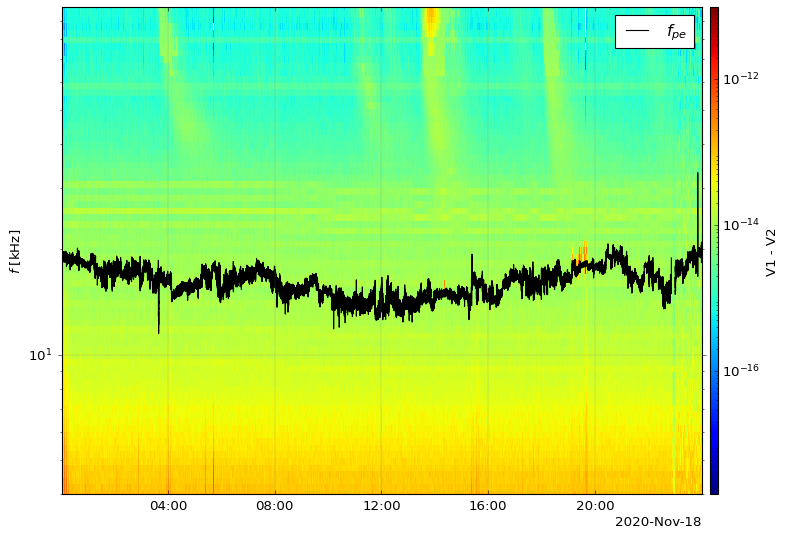

In [21]:
f, ax = plt.subplots(1, figsize=(10, 7))
f.subplots_adjust(left=.1, right=.9, bottom=.08, top=.95)
ax, cax = plot_spectr(ax, tnr_spec, yscale="log", cscale="log")
plot_line(ax, f_pe, color="k", label="$f_{pe}$")
ax.legend()
ax.tick_params("y", which="both", direction="out")
ax.yaxis.set_major_locator(ticker.LogLocator(base=10, numticks=15))
ax.set_ylabel("$f$ [kHz]")
cax.set_ylabel("V1 - V2")

<a id='some_waves'></a>

## Langmuir Waves

In [22]:
tint = ["2021-05-12T00:00:00", "2021-05-12T23:59:59"]

# TNR spectrum
sensor = 4
tnr_spec = solo.read_tnr(tint)

# LFR density
dens = solo.read_lfr_density(tint)

# Compute plasma line
w_pe = np.sqrt(dens * constants.elementary_charge ** 2 / (constants.electron_mass * constants.epsilon_0))
f_pe = w_pe / (2 * np.pi)

15-Sep-22 16:57:20: Loading solo_L2_rpw-tnr-surv_20210512_V02.cdf...
15-Sep-22 16:57:20: Loading solo_L3_rpw-bia-density_20210512_V01.cdf...


### Plot TNR spectrum

Text(0, 0.5, 'V1 - V2')

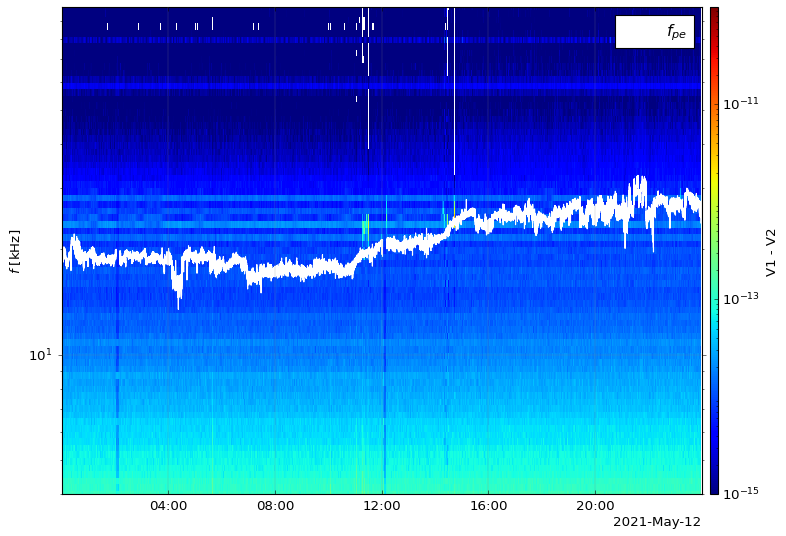

In [23]:
f, ax = plt.subplots(1, figsize=(10, 7))
f.subplots_adjust(left=.1, right=.9, bottom=.08, top=.95)
ax, cax = plot_spectr(ax, tnr_spec, yscale="log", cscale="log", clim=[1e-15, 1e-10])
plot_line(ax, f_pe, color="w", label="$f_{pe}$")
ax.legend()
ax.tick_params("y", which="both", direction="out")
ax.yaxis.set_major_locator(ticker.LogLocator(base=10, numticks=15))
ax.set_ylabel("$f$ [kHz]")
cax.set_ylabel("V1 - V2")

<a id='earths_flyby'></a>